# Guía 1

## 6 - Regresión Lineal: Mínimos cuadrados

![](https://nextjournal.com/data/QmfPuPp4V74FyvTTojMj6ix9T8Skj1ji4GhX5Pr6zK8w4N?content-type=image%2Fpng&filename=linear-regression.png)

https://en.wikipedia.org/wiki/Linear_regression

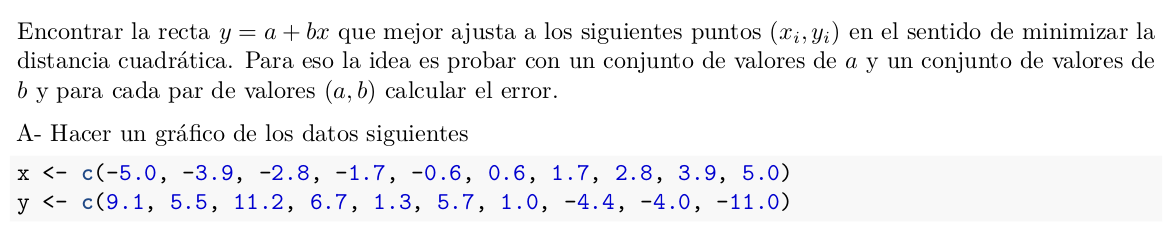

In [2]:
x <- c(-5.0, -3.9, -2.8, -1.7, -0.6, 0.6, 1.7,  2.8,  3.9,   5.0)
y <- c( 9.1,  5.5, 11.2,  6.7,  1.3, 5.7, 1.0, -4.4, -4.0, -11.0)

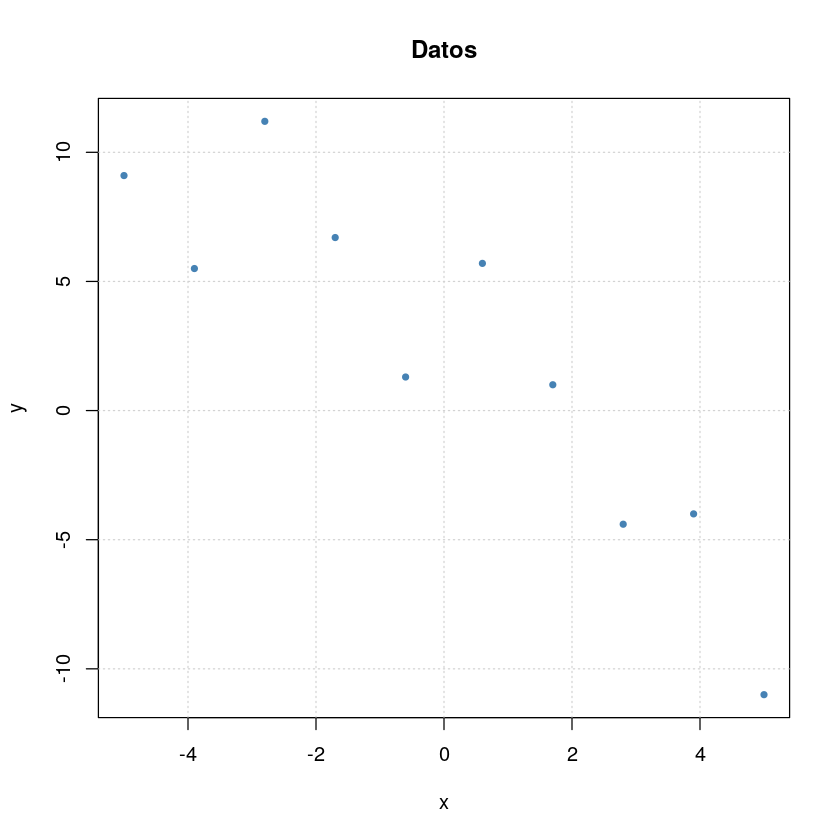

In [22]:
plot(x, y, col="steelblue",
     main="Datos", pch=20)
grid()

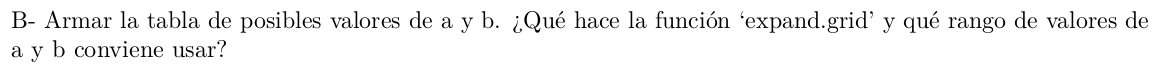

In [26]:
# Uso a como pendiente, b ordenada al origen
# Estimo un rango de pendiente aproximado viendo los puntos de arriba.
# La pendiente es negativa, y la ordenada al origen positiva menor a 5
p <- expand.grid(a=seq(-3, 1, by=0.01),
                 b=seq( 0, 4, 0.01))

C- Calcular el error cuadrático para cada par de valores (a, b)

In [28]:
# Vector que contendrá el error para cada par (a_k, b_k)
error2 <- rep(NA, nrow(p))
for(k in 1:nrow(p)){
    a <- p$a[k]
    b <- p$b[k]
    # Operacion vectorial sobre la tira de datos
    # Notar que es la misma operacion que con un for loop
    error2[k] <- sum((y - (a*x + b))^2)
}


D- Encontrar los valores (a, b) que minimizan el error cuadrático y con esos valores graficar la recta
correspondiente por sobre los puntos graficados antes.

In [6]:
# Busco el indice del error más chico
kmin <- which.min(error2)
# Recupero (a_kmin, b_kmin)
a.best <- p$a[kmin]
b.best <- p$b[kmin]

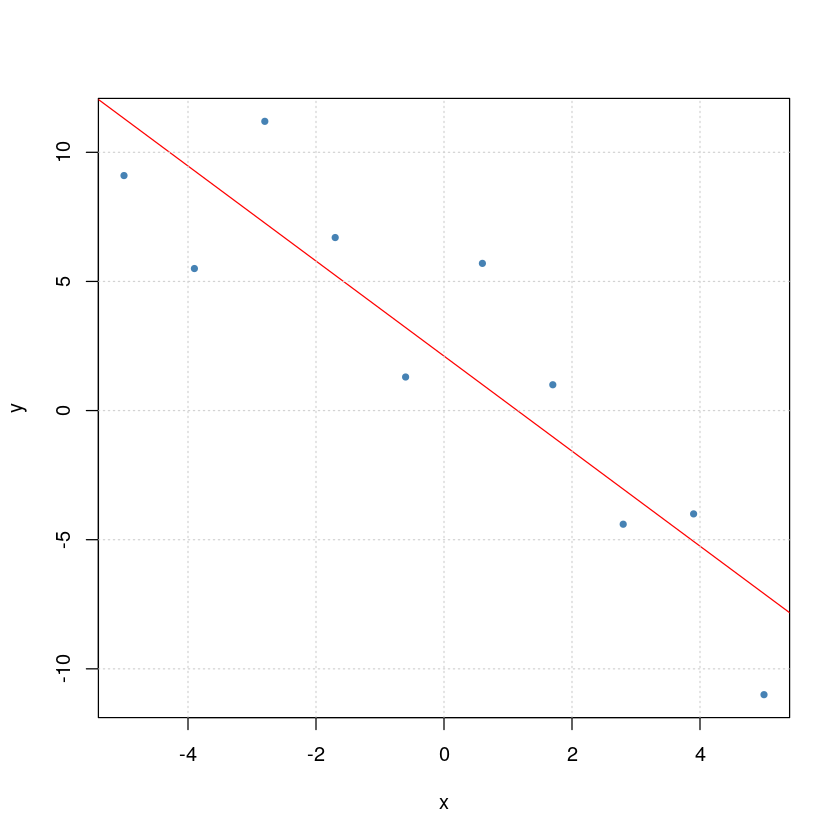

In [29]:
# Grafico la recta correspondiente a los datos encontrados
plot(x,y, col="steelblue", pch=20)
#points(x, a.best*x + b.best, pch=19, col="red")
abline(b.best, a.best, col="red")
grid()

In [30]:
# Pendiente y ordenada al origen encontradas
print(p[kmin,])

          a    b
84728 -1.84 2.11


E- Comparar el resultado obtenido con la función de R ‘lm’ que calcula analíticamente los mejores parámtros.

In [31]:
# Solucion optima (derivo e igualo a cero)
#?lm
lm(y~x)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
      2.110       -1.835  


### Just for fun: Regresión Lineal: Mínimos Cuadrados Ortogonales

![](https://cdn-images-1.medium.com/max/1200/1*illoIj5LRD3NrQ69iV30kw.png)

https://en.wikipedia.org/wiki/Total_least_squares

Usando distancia perpendicular a la recta calculada por Emiliano Martinez

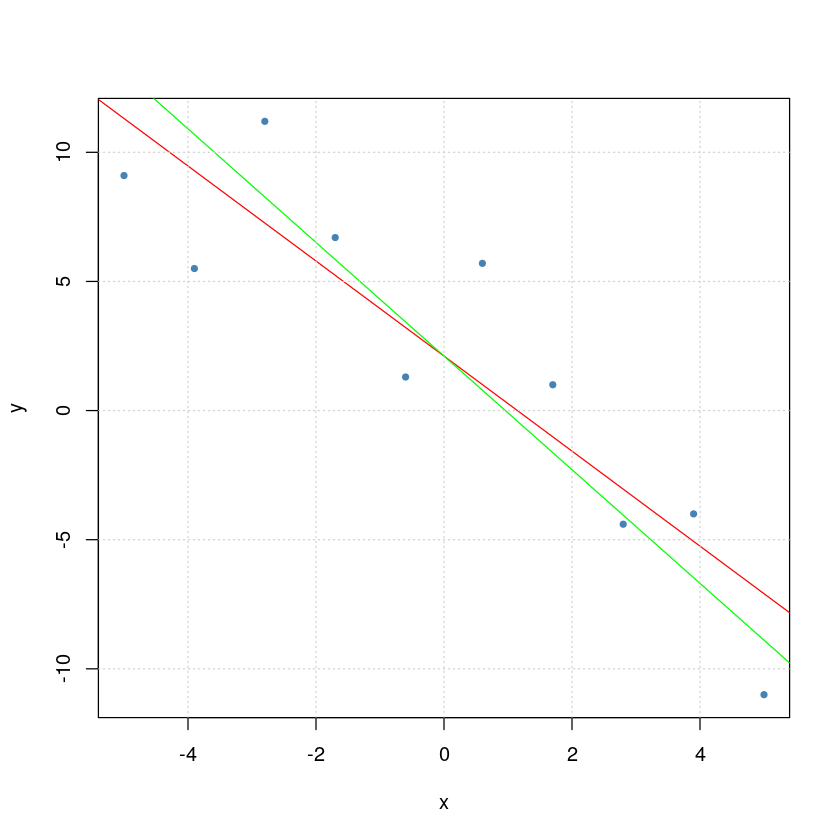

In [24]:
errorL2 <- rep(NA, nrow(p))
for(k in 1:nrow(p)){
    aL2 <- p$a[k]
    bL2 <- p$b[k]

    errorL2[k] <- sum((y - (aL2*x + bL2))^2 / (aL2^2 + 1))
}

kminL2 <- which.min(errorL2)
aL2.best <- p$a[kminL2]
bL2.best <- p$b[kminL2]

plot(x, y, col="steelblue", pch=20)
#points(x, a.best*x+ b.best, pch=19, col="red")
abline(b.best, a.best, col="red")
abline(bL2.best, aL2.best, col="green")
grid()

In [25]:
print(p[kminL2,])

         a    b
84692 -2.2 2.11


## 7 - Monty Hall

![](https://i.imgur.com/J5YwNfX.jpg)

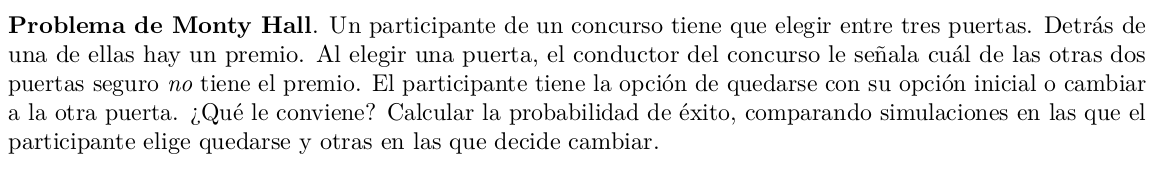

In [10]:
play <- function(policy=0){
    # Policy 0: Always stay
    # Policy 1: Always change

    doors <- c(1:3)
    prize <- sample(doors, 1)
    #free <- doors[doors!=prize]

    first_elec <- sample(doors, 1)

    if(policy==0){
        # Policy 0
        # Se le ofrece cambiar y NO cambia
        if(prize == first_elec){
            win=TRUE
        }else{
            win=FALSE
        }
    } else {
        # Policy 1
        # Se le ofrece cambiar y cambia
        # (Monty SIEMPRE muestra la puerta que NO es)
        sec_doors <- doors[doors!=first_elec]
        if(prize %in% sec_doors){
            win=TRUE
        }else{
            win=FALSE
        }
    }
    return(win)
}

In [15]:
Nrep <- 90000

In [34]:
## Simulo Nrep juegos
count_wins_0 <- 0

for(i in 1:Nrep){
    win <- play(policy=0)

    if(win){
        # Gana
        count_wins_0 = count_wins_0 + 1
    }
}

p_win_0 <- count_wins_0/Nrep

In [35]:
count_wins_1 <- 0

for(i in 1:Nrep){
    win <- play(policy=1)

    if(win){
        # Gana
        count_wins_1 = count_wins_1 + 1
    }
}

p_win_1 <- count_wins_1/Nrep

In [36]:
# Probabilidad de ganar con estrategia 0
p_win_0

[1] 0.3329444

In [37]:
# Probabilidad de ganar con estrategia 1
p_win_1

[1] 0.6659778

### Respuesta:

> Conviene cambiar siempre.